## 分析思路梳理：基于用户的数据进行聚类

1、数据的读取

2、数据的探索（目的是为数据预处理做准备）

3、数据的预处理（变量的选择、缺失值、异常值、数据类型、标准化处理）

4、模型的搭建（确定最优K值-聚类）

### 数据的读取及探索

In [1]:
import numpy as np
import pandas as pd

In [2]:
df_order=pd.read_csv(r"C:\Users\CDA\Desktop\第十二周推荐系统案例\data\orders.csv")

In [3]:
df_order.head()

,订单编号,买家会员名,买家支付宝账号,买家应付货款,买家应付邮费,买家支付积分,总金额,返点积分,买家实际支付金额,买家实际支付积分,...,是否代付,定金排名,修改后的sku,修改后的收货地址,异常信息,天猫卡券抵扣,集分宝抵扣,是否是O2O交易,退款金额,预约门店
0,21407300627014900,1425,yorzikyA6C,58.51,0.0,0,58.51,0,58.51,0,...,否,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,24270488269081200,2163,AC870BA5860,15.70,5.0,0,20.70,0,20.70,0,...,否,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,21402600386365500,375,AC7574B65A0,7.90,5.0,0,12.90,0,12.90,0,...,否,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
3,21398820349555700,2618,A807C90766A,4.81,5.0,0,9.81,0,9.81,0,...,否,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,21446781606162100,2012,A505588565B,23.92,5.0,0,28.92,0,28.92,0,...,否,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


In [4]:
df_order.tail()

,订单编号,买家会员名,买家支付宝账号,买家应付货款,买家应付邮费,买家支付积分,总金额,返点积分,买家实际支付金额,买家实际支付积分,...,是否代付,定金排名,修改后的sku,修改后的收货地址,异常信息,天猫卡券抵扣,集分宝抵扣,是否是O2O交易,退款金额,预约门店
3984,11602682877778600,1175,A5A0C695AB4,8.70,5.0,0,13.70,0,13.70,0,...,否,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
3985,12870990828917200,727,A57B47C8C69,64.40,0.0,0,64.40,0,64.40,0,...,否,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
3986,12870110713574600,512,A47A4CCC5C7,99.20,0.0,0,99.20,0,99.20,0,...,否,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
3987,11605841458021300,501,A5A0C0CA696,73.50,0.0,0,73.50,0,73.50,0,...,否,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
3988,12863450268576000,2414,A8608787884,597.12,0.0,0,597.12,0,597.12,0,...,否,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


In [6]:
df_order.shape

(3989, 46)

In [5]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3989 entries, 0 to 3988
Data columns (total 46 columns):
订单编号        3989 non-null int64
买家会员名       3989 non-null int64
买家支付宝账号     3988 non-null object
买家应付货款      3989 non-null float64
买家应付邮费      3989 non-null float64
买家支付积分      3989 non-null int64
总金额         3989 non-null float64
返点积分        3989 non-null int64
买家实际支付金额    3989 non-null float64
买家实际支付积分    3989 non-null int64
订单状态        3989 non-null object
买家留言        384 non-null object
收货人姓名       3989 non-null int64
收货地址        3989 non-null object
运送方式        3989 non-null object
联系电话        142 non-null object
联系手机        3986 non-null object
订单创建时间      3989 non-null object
订单付款时间      3989 non-null object
宝贝标题        3989 non-null object
宝贝种类        3989 non-null int64
物流单号        3988 non-null object
物流公司        3988 non-null object
订单备注        460 non-null object
宝贝总数量       3989 non-null int64
店铺Id        3989 non-null int64
店铺名称        3989 non-null int64
订单关闭原因     

In [8]:
df_item=pd.read_csv(r"C:\Users\CDA\Desktop\第十二周推荐系统案例\data\Items_orders.csv")

In [9]:
df_item.head()

,订单编号,标题,价格,购买数量,外部系统编号,商品属性,套餐信息,备注,订单状态,商家编码
0,21407300627014900,发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家,0.58,12,WY013-2SZD0426,颜色分类：小号,NaN,NaN,交易成功,WY013-2SZD0426
1,21407300627014900,特价5号AA普通干电池 电动玩具配件 厂家直销批,1.00,20,HT-5H0094,NaN,NaN,NaN,交易成功,HT-5H0094
2,21407300627014900,大号泡泡棒沙滩小铲子工具泡泡枪公园吹泡泡户外亲子游戏玩具热卖,1.20,16,GC018005,NaN,NaN,NaN,交易成功,GC018005
3,21407300627014900,特价正品7号电池儿童电动玩具电源配件 厂家直销1元4节地摊货批发,1.00,10,HT-7H0093,NaN,NaN,NaN,交易成功,HT-7H0093
4,21407300627014900,儿童沙滩玩具水枪 宝宝玩水玩具户外洗澡游泳漂流戏大号水枪批发,6.79,1,GC080003,套餐类型：标准配置;颜色分类：33000蓝色水枪,NaN,NaN,交易成功,GC080003


In [10]:
df_item.tail()

,订单编号,标题,价格,购买数量,外部系统编号,商品属性,套餐信息,备注,订单状态,商家编码
21892,12863450268576000,新款回力小车军事导弹车模型儿童玩具创意小孩礼物玩具货源批发,1.88,3,GC025039,NaN,NaN,NaN,交易成功,GC025039
21893,12863450268576000,创意宝宝玩具婴儿摇铃中号小喇叭安全材质0-1岁早教儿童玩具批,5.05,5,GC054006,颜色分类：大号手抓球;大小描述：单个（颜色随机）,NaN,NaN,交易成功,GC054006
21894,12863450268576000,儿童沙滩玩具车套装创意礼物益智挖沙玩具 地摊货源儿童玩具批发,1.90,5,802STC0081,颜色分类：802沙滩车,NaN,NaN,交易成功,802STC0081
21895,12863450268576000,创意发光球闪光透明发光水晶弹力球儿童小玩具 夜市地摊货源批发,1.85,5,SJQ-DS0071,颜色分类：带绳水晶球5.5CM,NaN,NaN,交易成功,SJQ-DS0071
21896,12863450268576000,创意卡通音乐手机儿童益智男孩宝宝礼物义乌地摊热卖货源玩具批,2.35,3,GC064001,NaN,NaN,NaN,交易成功,GC064001


In [11]:
df_item.shape

(21897, 10)

In [12]:
df_atrr=pd.read_csv("C:\Users\CDA\Desktop\第十二周推荐系统案例\data/Items_attribute.csv",encoding='gbk')

In [13]:
df_atrr.head()

,宝贝ID,标题,价格,玩具类型,适用年龄,品牌
0,537396783238,创意新款回力小车惯性坦克 军事儿童玩具模型地摊货源玩具车批发,8.90,塑胶玩具,"3岁,4岁,5岁,6岁",3
1,36286235128,2017热卖大号仿真惯性挖土机儿童益智礼品创意义乌地摊货玩具批发,3.90,其它玩具,"3岁,4岁,5岁,6岁",3
2,35722000205,创意发光球闪光透明发光水晶弹力球儿童小玩具 夜市地摊货源批发,1.65,其它玩具,"3岁,4岁,5岁,6岁,7岁,8岁,9岁,10岁,11岁,12岁",3
3,550659732532,新款创意六一儿童节礼物音乐投影电动枪夜市地摊货源批发男孩玩具,9.90,其它玩具,"3岁,4岁,5岁,6岁,7岁,8岁,9岁,10岁,11岁,12岁,13岁,14岁",3
4,531877266868,发条玩具批发上链卡通动物青蛙儿童礼物宝宝玩具经典80后益智地摊,1.85,其它玩具,"3岁,4岁",3


In [14]:
df_atrr.tail()

,宝贝ID,标题,价格,玩具类型,适用年龄,品牌
283,547790825984,创意儿童发光皇冠陀螺闪光男孩宝宝礼物夜市地摊货源玩具批发热卖,5.79,其它玩具,"3岁,4岁,5岁,6岁,7岁,8岁,9岁,10岁,11岁,12岁,13岁,14岁",3
284,522060783761,创意过家家玩具批发儿童DIY手工制作拖鞋画手工制作创意贴画拼图,2.25,NaN,"3岁,4岁,5岁,6岁,7岁",0
285,540522690300,新品手掌摇铃0-1岁婴幼儿摇铃3-6-12个月早教益智玩具手摇铃婴儿,2.65,其它玩具,"6个月,12个月,18个月",2
286,551675713112,过家家切切乐礼盒套装女孩厨房玩具儿童礼物宝宝做饭仿真厨具餐具,19.90,仿真厨房类,"3岁,4岁,5岁,6岁,7岁,8岁,9岁,10岁,11岁,12岁",2
287,537829232054,创意新品音乐电动万向轮发光越野车好玩儿童玩具自动转向热卖特价,9.80,其它玩具,"3岁,4岁,5岁,6岁,7岁,8岁,9岁,10岁,11岁,12岁",2


In [15]:
df_atrr.shape

(288, 6)

### 对用户的订单行为进行分析，获取用户的特征

#### 数据的探索与处理

In [16]:
df_order.shape

(3989, 46)

In [17]:
df_order.columns

Index(['订单编号', '买家会员名', '买家支付宝账号', '买家应付货款', '买家应付邮费', '买家支付积分', '总金额', '返点积分',
       '买家实际支付金额', '买家实际支付积分', '订单状态', '买家留言', '收货人姓名', '收货地址', '运送方式',
       '联系电话 ', '联系手机', '订单创建时间', '订单付款时间 ', '宝贝标题 ', '宝贝种类', '物流单号 ', '物流公司',
       '订单备注', '宝贝总数量', '店铺Id', '店铺名称', '订单关闭原因', '卖家服务费', '买家服务费', '发票抬头',
       '是否手机订单', '分阶段订单信息', '特权订金订单id', '是否上传合同照片', '是否上传小票', '是否代付', '定金排名',
       '修改后的sku', '修改后的收货地址', '异常信息', '天猫卡券抵扣', '集分宝抵扣', '是否是O2O交易', '退款金额',
       '预约门店'],
      dtype='object')

In [18]:
#把列字段中的前后空格去除
col=[]
for i in range(df_order.shape[1]):
    col.append(df_order.columns[i].strip())

In [19]:
df_order.columns=col

#### 基于业务评估对字段进行选择

In [20]:
df_order[df_order.联系电话.notnull()][['联系电话','联系手机']]

,联系电话,联系手机
32,'010-58758375,A56AA8980CB
41,'010-63036426,AC8A0ACD009
73,'182217-1822177212,A8BBA77BAB6
88,'0760-23860692,NaN
98,'0438-6180034,AC9DC878DA7
156,'0593-2082566,ACCB895CA77
198,'0663-2558099,A5975A7A8B8
201,'0771-8536777,A8577AB9586
210,'0535-1510657-4707,A5A0657D707
250,'0793-1507933137,A5079CCAC7D


In [21]:
(df_order.总金额==df_order.买家实际支付金额).value_counts()

True     3943
False      46
dtype: int64

In [22]:
df_order[df_order.总金额!=df_order.买家实际支付金额]

,订单编号,买家会员名,买家支付宝账号,买家应付货款,买家应付邮费,买家支付积分,总金额,返点积分,买家实际支付金额,买家实际支付积分,...,是否代付,定金排名,修改后的sku,修改后的收货地址,异常信息,天猫卡券抵扣,集分宝抵扣,是否是O2O交易,退款金额,预约门店
112,21072763406286400,1803,A77BB74B7B0,107.08,0.0,0,107.08,0,104.10,0,...,否,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.98,NaN
228,23794310267368000,466,A5766C68B85,75.50,0.0,0,75.50,0,59.10,0,...,否,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.40,NaN
470,23300528991848400,2672,A5C8AAA0AA0,91.78,0.0,0,91.78,0,52.45,0,...,否,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.33,NaN
540,23186468899456700,1407,A564BB7678C,96.47,0.0,0,96.47,0,20.88,0,...,否,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.59,NaN
563,23157190921251600,2319,AC67BBA8ACB,56.15,0.0,0,56.15,0,53.64,0,...,否,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.51,NaN
595,19783060401496200,1811,AC7BA095570,195.00,0.0,0,195.00,0,120.90,0,...,否,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.10,NaN
599,19805022816114000,1145,AA97AABC6Bqq,8.90,5.0,0,13.90,0,0.00,0,...,否,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.90,NaN
782,19309300762666800,1066,A50BC49A78A,169.28,0.0,0,169.28,0,84.04,0,...,否,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.24,NaN
799,19280062476948800,712,A5975604A5BAC9,119.57,0.0,0,119.57,0,113.73,0,...,否,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.84,NaN
1080,18643981250261300,2598,BA058C5C67qq,31.80,5.0,0,36.80,0,35.21,0,...,否,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.59,NaN


In [27]:
#基于业务对字段进行评估
col1 = ['买家支付宝账号', '买家应付货款', '买家应付邮费', '买家支付积分', '总金额', '返点积分', 
        '运送方式', '联系电话', '联系手机', '物流单号', '物流公司', '店铺Id', '店铺名称']
col1

['买家支付宝账号',
 '买家应付货款',
 '买家应付邮费',
 '买家支付积分',
 '总金额',
 '返点积分',
 '运送方式',
 '联系电话',
 '联系手机',
 '物流单号',
 '物流公司',
 '店铺Id',
 '店铺名称']

In [28]:
df_order_d1=df_order.drop(col1,axis=1)

In [29]:
df_order_d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3989 entries, 0 to 3988
Data columns (total 33 columns):
订单编号        3989 non-null int64
买家会员名       3989 non-null int64
买家实际支付金额    3989 non-null float64
买家实际支付积分    3989 non-null int64
订单状态        3989 non-null object
买家留言        384 non-null object
收货人姓名       3989 non-null int64
收货地址        3989 non-null object
订单创建时间      3989 non-null object
订单付款时间      3989 non-null object
宝贝标题        3989 non-null object
宝贝种类        3989 non-null int64
订单备注        460 non-null object
宝贝总数量       3989 non-null int64
订单关闭原因      3989 non-null object
卖家服务费       3989 non-null int64
买家服务费       3989 non-null object
发票抬头        0 non-null float64
是否手机订单      3728 non-null object
分阶段订单信息     0 non-null float64
特权订金订单id    0 non-null float64
是否上传合同照片    3989 non-null object
是否上传小票      3989 non-null object
是否代付        3989 non-null object
定金排名        0 non-null float64
修改后的sku     0 non-null float64
修改后的收货地址    61 non-null object
异常信息        0 non-null

#### 针对缺失值过多的字段进行分析

In [30]:
#找到缺失值大于80%的字段进行分析
df_order_d1.isnull().mean()>0.8
#df_order_d1.isnull().sum()/df_order_d1.shape[0]#这两者相同

订单编号        False
买家会员名       False
买家实际支付金额    False
买家实际支付积分    False
订单状态        False
买家留言         True
收货人姓名       False
收货地址        False
订单创建时间      False
订单付款时间      False
宝贝标题        False
宝贝种类        False
订单备注         True
宝贝总数量       False
订单关闭原因      False
卖家服务费       False
买家服务费       False
发票抬头         True
是否手机订单      False
分阶段订单信息      True
特权订金订单id     True
是否上传合同照片    False
是否上传小票      False
是否代付        False
定金排名         True
修改后的sku      True
修改后的收货地址     True
异常信息         True
天猫卡券抵扣       True
集分宝抵扣        True
是否是O2O交易     True
退款金额        False
预约门店         True
dtype: bool

In [31]:
df_order_d1['订单编号'].isnull().mean()>0.8

False

In [32]:
for i in df_order_d1.columns:
    if df_order_d1[i].isnull().mean()>0.8:
        print(i)
        print(df_order_d1[i].isnull().mean())
        print(df_order_d1[i].value_counts())
        print('---------------------')

买家留言
0.9037352719979945
邮政                                  24
发邮政                                  9
申通快递                                 8
不要放任何发货清单和与产品有关的宣传页。                 8
发申通                                  6
申通                                   5
邮政快递                                 4
发邮政。                                 3
发汇通                                  3
开张收据给我                               2
申通中通                                 2
发邮政快递                                2
开收据:顺儿乐托儿所                           2
尽快发货                                 2
开收据                                  2
请发邮政                                 2
早点发货送个礼物谢谢                           2
发中通                                  2
发申通快递                                2
发光蝴蝶请发红色，快递发邮政!谢谢拉                   1
发光翅膀，蓝色只要两个，其他颜色分开来发。发光棒颜色分开发        1
请发圆通，中通或韵达谢谢                         1
一定要发邮政                               1
麻烦仔细检查后再发货                           1
请检查好质量，多送几个尾巴，多送几个孔雀，谢谢              1
一

In [33]:
#将修改后的地址更新到收货地址中去
df_order_d1[df_order_d1.修改后的收货地址.notnull()].index

Int64Index([  75,  102,  125,  146,  197,  209,  255,  389,  390,  523,  615,
             665,  710,  731,  838, 1206, 1348, 1381, 1483, 1486, 1488, 1504,
            1509, 1510, 1630, 1639, 1673, 1753, 1833, 1835, 1899, 2031, 2167,
            2174, 2254, 2351, 2421, 2566, 2793, 2873, 2934, 2985, 2987, 2992,
            3017, 3138, 3216, 3225, 3227, 3243, 3295, 3339, 3407, 3466, 3519,
            3534, 3570, 3887, 3940, 3948, 3950],
           dtype='int64')

In [37]:
df_order_d1['收货地址'][1] = 

'江西省 九江市 浔阳区 甘棠街道浔阳东路108号儿童保健康复中心亲子园(332000)'

In [38]:
for i in df_order_d1[df_order_d1.修改后的收货地址.notnull()].index:
    df_order_d1.loc[i,'收货地址']=df_order_d1.修改后的收货地址[i]

In [39]:
df_order_d1[df_order_d1.修改后的收货地址.notnull()]

,订单编号,买家会员名,买家实际支付金额,买家实际支付积分,订单状态,买家留言,收货人姓名,收货地址,订单创建时间,订单付款时间,...,是否代付,定金排名,修改后的sku,修改后的收货地址,异常信息,天猫卡券抵扣,集分宝抵扣,是否是O2O交易,退款金额,预约门店
75,24117190794315500,3293,58.63,0,交易成功,NaN,1847,湖北省 武汉市 新洲区 道观河旅游大道200号,2017/5/30 12:30,2017/5/30 13:21,...,否,NaN,NaN,湖北省 武汉市 新洲区 道观河旅游大道200号,NaN,NaN,NaN,NaN,0.0,NaN
102,24075671829256900,1379,55.93,0,交易成功,NaN,30,江西省 抚州市 临川区 唱凯镇老街上,2017/5/30 7:45,2017/5/30 7:45,...,否,NaN,NaN,江西省 抚州市 临川区 唱凯镇老街上,NaN,NaN,NaN,NaN,0.0,NaN
125,21056841191798100,3200,56.70,0,交易成功,NaN,1834,广东省 潮州市 潮安区东凤镇下张村烈士墓附近,2017/5/29 22:20,2017/5/29 22:27,...,否,NaN,NaN,广东省 潮州市 潮安区东凤镇下张村烈士墓附近,NaN,NaN,NaN,NaN,0.0,NaN
146,20934780950326200,2708,11.87,0,交易成功,NaN,1866,广东省 东莞市 望牛墩镇望东函谷村17巷167号,2017/5/29 18:59,2017/5/29 19:00,...,否,NaN,NaN,广东省 东莞市 望牛墩镇望东函谷村17巷167号,NaN,NaN,NaN,NaN,0.0,NaN
197,20805782044031300,1574,58.95,0,交易成功,NaN,209,河南省 商丘市 夏邑县 南环区百老汇,2017/5/29 12:15,2017/5/29 12:16,...,否,NaN,NaN,河南省 商丘市 夏邑县 南环区百老汇,NaN,NaN,NaN,NaN,0.0,NaN
209,20775382044226200,343,67.06,0,交易成功,NaN,2358,江苏省 镇江市 扬中市 环城南路48号,2017/5/29 11:03,2017/5/29 11:03,...,否,NaN,NaN,江苏省 镇江市 扬中市 环城南路48号,NaN,NaN,NaN,NaN,0.0,NaN
255,20591360773432300,516,11.80,0,交易成功,NaN,2428,河南省 三门峡市 卢氏县 城关镇 河南省三门峡市卢氏县西关县医院后面,2017/5/28 20:47,2017/5/28 20:48,...,否,NaN,NaN,河南省 三门峡市 卢氏县 城关镇 河南省三门峡市卢氏县西关县医院后面,NaN,NaN,NaN,NaN,0.0,NaN
389,23478669065313100,1977,11.88,0,交易成功,NaN,3283,河南省 新乡市 封丘县 城关乡卫生院旁东城水岸,2017/5/27 19:27,2017/5/27 19:30,...,否,NaN,NaN,河南省 新乡市 封丘县 城关乡卫生院旁东城水岸,NaN,NaN,NaN,NaN,0.0,NaN
390,23458228552313100,1977,47.76,0,交易成功,NaN,3283,河南省 新乡市 封丘县 城关乡卫生院旁东城水岸,2017/5/27 19:24,2017/5/27 19:30,...,否,NaN,NaN,河南省 新乡市 封丘县 城关乡卫生院旁东城水岸,NaN,NaN,NaN,NaN,0.0,NaN
523,19928220254269400,2232,102.15,0,交易成功,NaN,1132,广东省 湛江市 徐闻县 城东大道小米厨卫,2017/5/26 21:04,2017/5/26 21:09,...,否,NaN,NaN,广东省 湛江市 徐闻县 城东大道小米厨卫,NaN,NaN,NaN,NaN,0.0,NaN


In [40]:
#把其余缺失值多余80%的数据删除
for i in df_order_d1.columns:
    if df_order_d1[i].isnull().mean()>0.8:
        del df_order_d1[i]

In [41]:
df_order_d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3989 entries, 0 to 3988
Data columns (total 20 columns):
订单编号        3989 non-null int64
买家会员名       3989 non-null int64
买家实际支付金额    3989 non-null float64
买家实际支付积分    3989 non-null int64
订单状态        3989 non-null object
收货人姓名       3989 non-null int64
收货地址        3989 non-null object
订单创建时间      3989 non-null object
订单付款时间      3989 non-null object
宝贝标题        3989 non-null object
宝贝种类        3989 non-null int64
宝贝总数量       3989 non-null int64
订单关闭原因      3989 non-null object
卖家服务费       3989 non-null int64
买家服务费       3989 non-null object
是否手机订单      3728 non-null object
是否上传合同照片    3989 non-null object
是否上传小票      3989 non-null object
是否代付        3989 non-null object
退款金额        3989 non-null float64
dtypes: float64(2), int64(7), object(11)
memory usage: 623.4+ KB


In [42]:
#继续探索剩余字段
df_order_d1.买家实际支付金额.value_counts()

12.90     124
11.90      58
34.90      44
20.90      33
13.90      28
10.90      23
14.90      21
12.80      20
24.90      19
16.80      19
21.90      18
20.80      16
9.90       16
58.00      15
18.80      15
12.75      14
54.00      14
44.90      13
38.80      13
59.00      13
16.70      12
17.90      11
24.80      11
100.00     10
7.90       10
14.80      10
18.90      10
90.00      10
25.70      10
44.00       9
         ... 
62.24       1
56.98       1
420.60      1
11.45       1
72.20       1
64.68       1
36.15       1
53.14       1
165.32      1
59.36       1
87.91       1
46.87       1
99.60       1
30.26       1
26.77       1
92.79       1
33.37       1
161.60      1
97.84       1
53.53       1
83.11       1
69.87       1
24.33       1
43.34       1
31.35       1
46.20       1
26.97       1
83.42       1
56.90       1
185.41      1
Name: 买家实际支付金额, Length: 2451, dtype: int64

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False

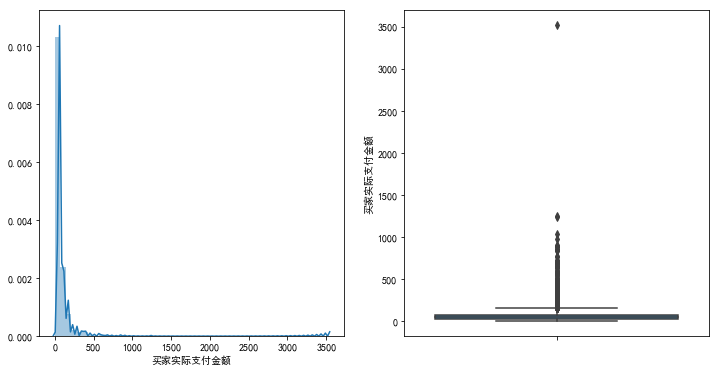

In [46]:
f,[ax1,ax2]=plt.subplots(1,2,figsize=(12,6))
sns.distplot(df_order_d1.买家实际支付金额,ax=ax1)
sns.boxplot(y='买家实际支付金额',data=df_order_d1,ax=ax2)
plt.show()

In [47]:
df_order_d1.买家实际支付金额.describe()

count    3989.000000
mean       72.613673
std       112.279791
min         0.000000
25%        22.080000
50%        52.320000
75%        77.000000
max      3521.000000
Name: 买家实际支付金额, dtype: float64

In [48]:
(77-22)*1.5+77

159.5

In [49]:
df_order_d1[(df_order_d1.买家实际支付金额<1500)&(df_order_d1.买家实际支付金额>159.5)]['买家实际支付金额'].value_counts()

160.00     5
200.00     4
360.00     4
195.00     4
350.00     4
460.00     3
220.00     3
255.00     3
358.00     3
370.00     3
590.00     3
280.00     3
290.00     3
230.00     2
184.74     2
206.00     2
580.00     2
169.00     2
318.00     2
173.60     2
570.00     2
400.00     2
310.00     2
165.00     2
170.00     2
680.00     2
394.00     2
175.00     2
275.00     2
720.00     2
          ..
403.00     1
910.00     1
267.16     1
882.00     1
313.70     1
253.50     1
345.00     1
181.42     1
1245.00    1
368.80     1
165.88     1
164.30     1
173.40     1
265.00     1
391.00     1
171.50     1
650.00     1
175.86     1
271.96     1
419.04     1
858.00     1
192.50     1
179.29     1
189.63     1
269.63     1
166.61     1
299.00     1
193.50     1
165.71     1
700.00     1
Name: 买家实际支付金额, Length: 284, dtype: int64

In [50]:
df_order_d1[df_order_d1.买家实际支付金额>1500]
#对于该字段的异常值
#1、1500以下的不予处理。数据量大且连续，自成一类特征
#2、1500以上的，考虑聚类效果，予以删除

,订单编号,买家会员名,买家实际支付金额,买家实际支付积分,订单状态,收货人姓名,收货地址,订单创建时间,订单付款时间,宝贝标题,宝贝种类,宝贝总数量,订单关闭原因,卖家服务费,买家服务费,是否手机订单,是否上传合同照片,是否上传小票,是否代付,退款金额
845,22672769847704100,2893,3521.0,0,交易成功,2067,福建省 厦门市 思明区 筼筜街道湖滨中路518号国土资源局(361001),2017/5/24 19:09,2017/5/24 19:12,益智拼装积木玩具卡通动物乐园系列3-6岁儿童早教认知大颗粒积木，儿童早教益智玩具卡通音乐琴早...,11,190,订单未关闭,0,0元,NaN,否,否,否,0.0


In [51]:
df_order_d2=df_order_d1[df_order_d1.买家实际支付金额<1200]#删除了买家实际支付金额的异常值数据

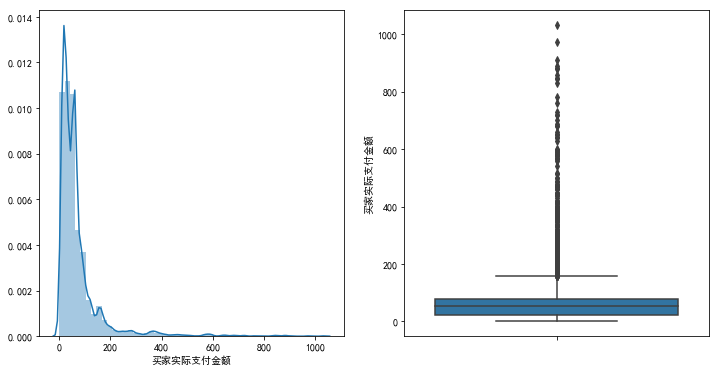

In [52]:
f,[ax1,ax2]=plt.subplots(1,2,figsize=(12,6))
sns.distplot(df_order_d2.买家实际支付金额,ax=ax1)
sns.boxplot(y='买家实际支付金额',data=df_order_d2,ax=ax2)
plt.show()

In [53]:
df_order_d2.shape

(3986, 20)

In [54]:
df_order_d2.买家实际支付积分.value_counts()

0    3986
Name: 买家实际支付积分, dtype: int64

In [55]:
len(df_order_d2.买家实际支付积分.value_counts())

1

In [56]:
#如果说一列字段仅表达一种信息的话，对于聚类场景下可删除
for col in df_order_d2.columns:
    cate_count=len(df_order_d2[col].value_counts())
    if cate_count==1:
        del df_order_d2[col]

In [57]:
df_order_d2.shape

(3986, 11)

In [58]:
df_order_d2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3986 entries, 0 to 3988
Data columns (total 11 columns):
订单编号        3986 non-null int64
买家会员名       3986 non-null int64
买家实际支付金额    3986 non-null float64
收货人姓名       3986 non-null int64
收货地址        3986 non-null object
订单创建时间      3986 non-null object
订单付款时间      3986 non-null object
宝贝标题        3986 non-null object
宝贝种类        3986 non-null int64
宝贝总数量       3986 non-null int64
退款金额        3986 non-null float64
dtypes: float64(2), int64(5), object(4)
memory usage: 373.7+ KB


In [59]:
df_order_d2.shape

(3986, 11)

In [60]:
(3076+266)/3986

0.8384345208228801

In [61]:
#继续探索收货人姓名字段
df_order_d2.groupby(by=['买家会员名','收货人姓名']).count()['订单编号'].value_counts()
#意义不太大，可删

1     3076
2      266
3       55
4       20
5        8
7        5
6        4
16       1
10       1
8        1
Name: 订单编号, dtype: int64

In [62]:
del df_order_d2['收货人姓名']

In [63]:
df_order_d2[df_order_d2.订单创建时间!=df_order_d2.订单付款时间]

,订单编号,买家会员名,买家实际支付金额,收货地址,订单创建时间,订单付款时间,宝贝标题,宝贝种类,宝贝总数量,退款金额
5,24273590145516800,2052,48.86,辽宁省 营口市 西市区 清华街道清华社区附近电联(115004),2017/5/30 22:49,2017/5/30 23:18,创意儿童发光刀玩具刀闪光刀剑男生礼物义乌货源地摊玩具批发免邮，新奇创意炫彩飞碟枪飞盘射击枪 ...,9,9,0.0
9,24255288928504800,3065,60.34,北京 北京市 朝阳区 和平街街道和平西苑10号楼501室(100013),2017/5/30 22:16,2017/5/30 22:17,儿童地摊小玩具批发经典创意幼儿园礼物100只装竹蜻蜓飞天小玩意，2017新款儿童水枪玩具3岁...,8,12,0.0
10,21382440582117100,3358,35.51,福建省 厦门市 思明区 鹭江街道九条巷42号(363100),2017/5/30 22:16,2017/5/30 22:18,创意拉线工程车3款新奇特惯性滑行小车儿童玩具礼物地摊货源批发，创意大号惯性工程车挖土机挖掘机...,11,13,0.0
11,24277249894695800,1893,245.79,河南省 三门峡市 义马市 千秋路街道河南省三门峡市义马市千秋矿连银小区2区46号楼2单元5楼...,2017/5/30 22:15,2017/5/30 22:16,创意发光球闪光透明发光水晶弹力球儿童小玩具 夜市地摊货源批发，创意新款回力小车惯性坦克 军事...,8,68,0.0
12,24281631960400700,2966,17.27,黑龙江省 绥化市 海伦市 海伦镇北二道街风和日丽香姿堂减肥会馆(152300),2017/5/30 22:00,2017/5/30 22:01,卡通动物彩虹圈创意弹簧圈叠叠乐3-6岁儿童发光玩具地摊货源批发，惯性玩具车大巴卡通玩具车公交...,4,4,0.0
14,24271029748394400,2197,12.90,贵州省 贵阳市 白云区 艳山红镇育才路，铁路旁（贵州车之家）(550014),2017/5/30 21:54,2017/5/30 21:55,特价创意变形大号套装模型发光礼物地摊货源义乌热卖儿童玩具批发,1,1,0.0
15,21402422508431400,2578,35.30,吉林省 长春市 二道区 吉林街道和顺街劳动公园北门。公园路。吉盛小区2-16栋1门401(1...,2017/5/30 21:53,2017/5/30 21:55,创意新款发光翅膀背带儿童演出服装天使蝴蝶翅膀地摊货源玩具批发，创意新款发光翅膀背带儿童演出服...,2,7,0.0
18,21399323302838400,533,32.05,福建省 莆田市 仙游县 鲤城街道东门社区东门街42号(351200),2017/5/30 21:38,2017/5/30 21:40,创意益智公主玩具女孩生日礼物礼盒单个婚纱新娘女童玩具娃娃热卖,1,3,0.0
21,21351260227840500,1159,119.57,贵州省 贵阳市 南明区 油榨社区服务中心油榨街口贵钢宿舍西区山花奶店(550002),2017/5/30 21:01,2017/5/30 21:04,儿童沙滩玩具车套装批发挖沙玩具 宝宝沙漏洗澡戏水 铲子沙子工具，创意新款回力小车惯性坦克 军...,15,15,0.0
23,24263511739274900,3204,101.51,辽宁省 葫芦岛市 连山区 寺儿堡镇新地号小学对面超市(125001),2017/5/30 20:53,2017/5/30 20:54,新款蜜蜂车翻斗车特技电动玩具车自动翻儿童玩具批发地摊货源新奇，新款蜜蜂车翻斗车特技电动玩具车...,7,30,0.0


In [64]:
del df_order_d2['订单创建时间']
del df_order_d2['订单付款时间']

In [65]:
df_order_d2.head(1)

,订单编号,买家会员名,买家实际支付金额,收货地址,宝贝标题,宝贝种类,宝贝总数量,退款金额
0,21407300627014900,1425,58.51,广东省 广州市 越秀区 华乐街道环市东路华侨新村光明路28号3a楼（即原文化假日酒店，后易名...,发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家，特价5号AA普通干电池 电动玩具...,5,59,0.0


In [66]:
df_order_d2.宝贝标题[0]

'发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家，特价5号AA普通干电池 电动玩具配件 厂家直销批，大号泡泡棒沙滩小铲子工具泡泡枪公园吹泡泡户外亲子游戏玩具热卖，特价正品7号电池儿童电动玩具电源配件 厂家直销1元4节地摊货批发，儿童沙滩玩具水枪 宝宝玩水玩具户外洗澡游泳漂流戏大号水枪批发'

In [67]:
del df_order_d2['宝贝标题']

In [68]:
df_order_d2.head()

,订单编号,买家会员名,买家实际支付金额,收货地址,宝贝种类,宝贝总数量,退款金额
0,21407300627014900,1425,58.51,广东省 广州市 越秀区 华乐街道环市东路华侨新村光明路28号3a楼（即原文化假日酒店，后易名...,5,59,0.0
1,24270488269081200,2163,20.70,江西省 九江市 浔阳区 甘棠街道浔阳东路108号儿童保健康复中心亲子园(332000),2,2,0.0
2,21402600386365500,375,12.90,浙江省 宁波市 江东区 新明街道明晨紫月227弄25号401室(315040),1,1,0.0
3,21398820349555700,2618,9.81,湖南省 邵阳市 其它区 湖南省邵阳市双清区铁砂岭小学后面(422000),1,1,0.0
4,21446781606162100,2012,28.92,安徽省 阜阳市 颍东区 新华街道尚武艺术培训中心(236058),1,8,0.0


In [69]:
df_order_d2.收货地址[0].split()[0]

'广东省'

In [72]:
df_order_d2.loc[:,'收货地址']=df_order_d2.loc[:,'收货地址'].apply(lambda x :x.split()[0])

In [73]:
df_order_d2.head()

,订单编号,买家会员名,买家实际支付金额,收货地址,宝贝种类,宝贝总数量,退款金额
0,21407300627014900,1425,58.51,广东省,5,59,0.0
1,24270488269081200,2163,20.70,江西省,2,2,0.0
2,21402600386365500,375,12.90,浙江省,1,1,0.0
3,21398820349555700,2618,9.81,湖南省,1,1,0.0
4,21446781606162100,2012,28.92,安徽省,1,8,0.0


In [74]:
df_order_d2.宝贝种类.value_counts()

1     1528
2      299
3      254
4      244
5      233
6      218
8      157
7      147
9      136
10     121
12      98
11      96
13      72
14      60
15      58
16      39
17      35
18      28
19      25
21      22
20      20
23      14
24      11
22       8
25       7
26       6
27       5
38       5
28       5
29       4
33       4
49       4
36       3
30       3
40       2
37       2
41       2
45       1
32       1
34       1
46       1
48       1
43       1
47       1
31       1
35       1
39       1
50       1
Name: 宝贝种类, dtype: int64

In [75]:
df_order_d2.宝贝种类.describe()

count    3986.000000
mean        5.489212
std         6.224290
min         1.000000
25%         1.000000
50%         3.000000
75%         8.000000
max        50.000000
Name: 宝贝种类, dtype: float64

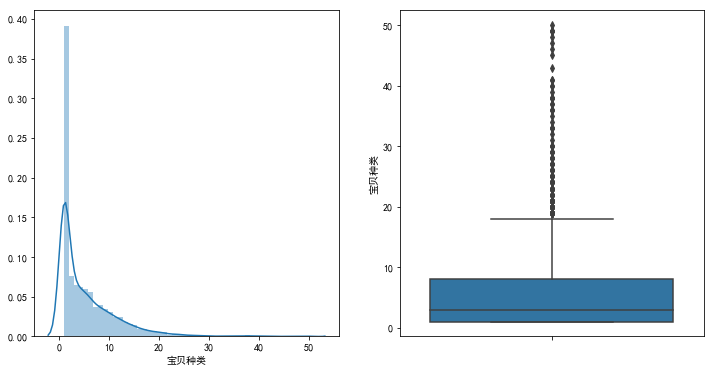

In [76]:
f,[ax1,ax2]=plt.subplots(1,2,figsize=(12,6))
sns.distplot(df_order_d2.宝贝种类,ax=ax1)
sns.boxplot(y='宝贝种类',data=df_order_d2,ax=ax2)
plt.show()

In [77]:
df_order_d2.宝贝总数量.describe()

count    3986.000000
mean       23.839940
std        44.951522
min         1.000000
25%         4.000000
50%        10.000000
75%        26.000000
max       820.000000
Name: 宝贝总数量, dtype: float64

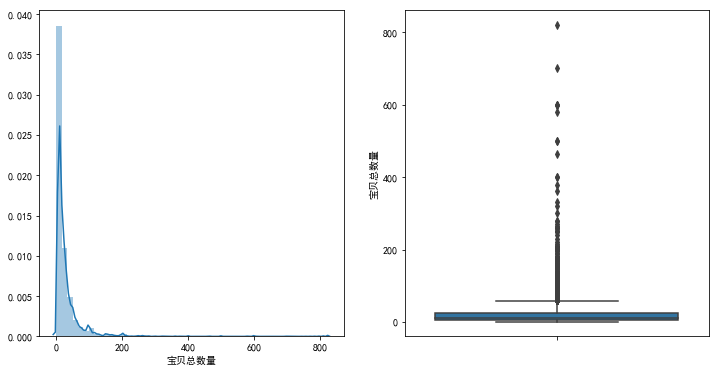

In [78]:
f,[ax1,ax2]=plt.subplots(1,2,figsize=(12,6))
sns.distplot(df_order_d2.宝贝总数量,ax=ax1)
sns.boxplot(y='宝贝总数量',data=df_order_d2,ax=ax2)
plt.show()

In [79]:
df_order_d2[df_order_d2.宝贝总数量>500]

,订单编号,买家会员名,买家实际支付金额,收货地址,宝贝种类,宝贝总数量,退款金额
929,22549669114817600,184,540.0,安徽省,3,600,0.0
1269,21963829567851000,1443,847.6,云南省,10,820,0.0
1927,16036882888478300,3342,600.0,湖北省,1,600,0.0
2474,18773789323448200,2225,650.0,山西省,14,580,0.0
3313,15330230253133200,3106,910.0,广西壮族自治区,1,700,0.0
3399,12791063266736000,325,882.0,河北省,2,600,0.0


In [80]:
df_order_d2[(df_order_d2.宝贝总数量>300)&(df_order_d2.宝贝总数量<500)]

,订单编号,买家会员名,买家实际支付金额,收货地址,宝贝种类,宝贝总数量,退款金额
708,19506742104148000,1561,567.00,浙江省,4,400,0.0
853,19162202401111100,1773,628.00,广东省,3,400,0.0
927,18958500282478400,1283,310.00,福建省,4,330,0.0
1258,18127180864027500,2036,730.00,天津,49,378,0.0
2068,15692123063610900,2016,460.00,广东省,5,320,0.0
2208,19690730194631500,2894,831.18,广东省,3,362,0.0
2346,19181288359997900,521,780.00,江西省,1,465,0.0


In [81]:
#为了保证聚类效果，删除数量大于500的数值
df_order_d3=df_order_d2[df_order_d2.宝贝总数量<500]

In [82]:
df_order_d3.head()

,订单编号,买家会员名,买家实际支付金额,收货地址,宝贝种类,宝贝总数量,退款金额
0,21407300627014900,1425,58.51,广东省,5,59,0.0
1,24270488269081200,2163,20.70,江西省,2,2,0.0
2,21402600386365500,375,12.90,浙江省,1,1,0.0
3,21398820349555700,2618,9.81,湖南省,1,1,0.0
4,21446781606162100,2012,28.92,安徽省,1,8,0.0


In [83]:
df_order_d3.shape

(3978, 7)

In [84]:
(3978-3932)/3978

0.011563599798893917

In [85]:
df_order_d3.退款金额.value_counts()

0.00      3932
6.90         2
0.99         2
35.01        1
2.67         1
31.90        1
1.69         1
25.16        1
13.90        1
19.95        1
14.61        1
15.06        1
31.46        1
48.50        1
39.33        1
35.90        1
5.84         1
5.37         1
30.09        1
6.54         1
2.98         1
12.00        1
1.16         1
1.80         1
3.68         1
0.90         1
74.10        1
85.24        1
1.59         1
1.49         1
17.80        1
2.30         1
315.49       1
75.59        1
132.62       1
20.88        1
108.39       1
26.16        1
14.15        1
36.86        1
15.22        1
3.90         1
3.52         1
16.40        1
2.51         1
Name: 退款金额, dtype: int64

In [86]:
del df_order_d3['退款金额']

In [87]:
df_order_d3.head()

,订单编号,买家会员名,买家实际支付金额,收货地址,宝贝种类,宝贝总数量
0,21407300627014900,1425,58.51,广东省,5,59
1,24270488269081200,2163,20.70,江西省,2,2
2,21402600386365500,375,12.90,浙江省,1,1
3,21398820349555700,2618,9.81,湖南省,1,1
4,21446781606162100,2012,28.92,安徽省,1,8


In [88]:
df_order_d3.isnull().mean()

订单编号        0.0
买家会员名       0.0
买家实际支付金额    0.0
收货地址        0.0
宝贝种类        0.0
宝贝总数量       0.0
dtype: float64

In [89]:
df_order_d3.买家会员名.value_counts()

1631    16
2148    10
2989     9
2926     8
2174     8
943      7
1782     7
327      7
2236     7
908      7
930      7
2263     6
1479     6
1874     6
2471     5
1977     5
1873     5
772      5
1603     5
68       5
3377     5
2270     5
3034     4
1913     4
815      4
2833     4
2278     4
1942     4
884      4
533      4
        ..
954      1
2999     1
950      1
946      1
3039     1
3043     1
3091     1
998      1
1042     1
3087     1
1038     1
3083     1
1034     1
3079     1
1030     1
3075     1
1026     1
3071     1
3067     1
1018     1
3063     1
1014     1
3059     1
1010     1
3055     1
1006     1
3051     1
1002     1
3047     1
0        1
Name: 买家会员名, Length: 3402, dtype: int64

In [90]:
user_info=df_order_d3.groupby(['买家会员名','收货地址']).mean()

In [91]:
del user_info['订单编号']

In [92]:
user_info.reset_index(inplace=True)

In [93]:
user_info.head()

,买家会员名,收货地址,买家实际支付金额,宝贝种类,宝贝总数量
0,0,福建省,14.90,1.0,1.0
1,1,北京,37.56,4.0,8.0
2,2,吉林省,58.50,2.0,15.0
3,3,浙江省,13.39,2.0,2.0
4,4,江苏省,30.87,6.0,6.0


### 基于用户所购买的商品属性特征，挖掘用户特征

In [94]:
df_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21897 entries, 0 to 21896
Data columns (total 10 columns):
订单编号      21897 non-null int64
标题        21897 non-null object
价格        21897 non-null float64
购买数量      21897 non-null int64
外部系统编号    21897 non-null object
商品属性      12636 non-null object
套餐信息      0 non-null float64
备注        130 non-null object
订单状态      21897 non-null object
商家编码      21897 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 1.7+ MB


In [95]:
df_order_d3.head()

,订单编号,买家会员名,买家实际支付金额,收货地址,宝贝种类,宝贝总数量
0,21407300627014900,1425,58.51,广东省,5,59
1,24270488269081200,2163,20.70,江西省,2,2
2,21402600386365500,375,12.90,浙江省,1,1
3,21398820349555700,2618,9.81,湖南省,1,1
4,21446781606162100,2012,28.92,安徽省,1,8


In [96]:
df_item.head()

,订单编号,标题,价格,购买数量,外部系统编号,商品属性,套餐信息,备注,订单状态,商家编码
0,21407300627014900,发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家,0.58,12,WY013-2SZD0426,颜色分类：小号,NaN,NaN,交易成功,WY013-2SZD0426
1,21407300627014900,特价5号AA普通干电池 电动玩具配件 厂家直销批,1.00,20,HT-5H0094,NaN,NaN,NaN,交易成功,HT-5H0094
2,21407300627014900,大号泡泡棒沙滩小铲子工具泡泡枪公园吹泡泡户外亲子游戏玩具热卖,1.20,16,GC018005,NaN,NaN,NaN,交易成功,GC018005
3,21407300627014900,特价正品7号电池儿童电动玩具电源配件 厂家直销1元4节地摊货批发,1.00,10,HT-7H0093,NaN,NaN,NaN,交易成功,HT-7H0093
4,21407300627014900,儿童沙滩玩具水枪 宝宝玩水玩具户外洗澡游泳漂流戏大号水枪批发,6.79,1,GC080003,套餐类型：标准配置;颜色分类：33000蓝色水枪,NaN,NaN,交易成功,GC080003


In [97]:
df_item.商品属性.value_counts()

颜色分类：发光翅膀;大小描述：大号                   354
颜色分类：带绳水晶球5.5CM                     282
颜色分类：黑色电动枪A;大小描述：均码                 221
颜色分类：398-13挖掘机                      219
颜色分类：2385新款挖掘机                      196
颜色分类：发条铁皮青蛙                         175
颜色分类：小兔子故事机;大小描述：均码                 160
套餐类型：标准配置;颜色分类：射击水枪                 149
颜色分类：极速陀螺                           146
颜色分类：磁性钓鱼（6条鱼）;大小描述：均码              144
颜色分类：混合战车套装                         136
颜色分类：孔雀开屏变色手指灯                      134
颜色分类：A380飞机;套餐类型：官方标配               132
颜色分类：802沙滩车                         126
颜色分类：蜜蜂翻斗车;套餐类型：官方标配                126
颜色分类：蘑菇电话机                          118
颜色分类：4个装奥特曼;大小描述：均码                 117
颜色分类：平毛倒退狗;大小描述：颜色随机                111
颜色分类：866铲车挖机                        108
颜色分类：拉线警车                           101
颜色分类：小鸭子手推车                         101
颜色分类：不发光翅膀;大小描述：大号                   98
颜色分类：电子小刀                            95
颜色分类：闪光透明星星蝴蝶                        90
颜色分类：卡通水机;大小描述：选好款式，颜色随机             85


In [98]:
df_item.套餐信息.value_counts()

Series([], Name: 套餐信息, dtype: int64)

In [99]:
df_item.shape

(21897, 10)

In [100]:
df_item.备注.value_counts()

邮政                          18
不要放任何发货清单和与产品有关的宣传页。         8
邮政快递                         2
开收据                          2
发邮政                          2
发邮政。                         2
请按默认地址发货。                    1
麻烦你今天发货                      1
亲开收据                         1
选一个粉色的                       1
不同颜色的                        1
记得发收据    小车颜色均匀              1
颜色款式混搭                       1
多送两个吧！万一有不亮的，孩子们就不够分了！       1
汇通，送小礼物                      1
请发超人强的，谢谢                    1
希望尽快发货，谢谢！                   1
一个红色一个黄色                     1
全部要粉红色                       1
多加一个车:我要一个黄色一个白色             1
亲快发货                         1
我要发货清单                       1
发韵达快递   百世快递                 1
发申通                          1
请检查好质量问题。                    1
请发3种颜色。谢谢！                   1
开收据，南京若相遇餐饮有限公司              1
请开收据，谢谢！另外黄色与蓝色各一半           1
如果有颜色，搭配一下                   1
要收据                          1
                            ..
收据，广州乐奇积教育咨询有限公司             1
发两个颜色   

In [101]:
df_item_d1=df_item.loc[:,['订单编号','标题','价格']]

In [102]:
df_item_d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21897 entries, 0 to 21896
Data columns (total 3 columns):
订单编号    21897 non-null int64
标题      21897 non-null object
价格      21897 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 513.3+ KB


In [103]:
item_order=pd.merge(df_order_d3,df_item_d1,on='订单编号',how='left')

In [104]:
item_order.head(1)

,订单编号,买家会员名,买家实际支付金额,收货地址,宝贝种类,宝贝总数量,标题,价格
0,21407300627014900,1425,58.51,广东省,5,59,发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家,0.58


In [105]:
user_info2=item_order.groupby(['买家会员名']).mean()

In [106]:
user_info2.reset_index(inplace=True)

In [107]:
user_info2=user_info2.loc[:,['买家会员名','价格']]

In [108]:
user_info2.head()#用户平均够买商品的单价

,买家会员名,价格
0,0,9.900000
1,1,4.957500
2,2,3.725000
3,3,4.520000
4,4,4.651667


In [109]:
user_info.head()

,买家会员名,收货地址,买家实际支付金额,宝贝种类,宝贝总数量
0,0,福建省,14.90,1.0,1.0
1,1,北京,37.56,4.0,8.0
2,2,吉林省,58.50,2.0,15.0
3,3,浙江省,13.39,2.0,2.0
4,4,江苏省,30.87,6.0,6.0


In [110]:
df_atrr.head()

,宝贝ID,标题,价格,玩具类型,适用年龄,品牌
0,537396783238,创意新款回力小车惯性坦克 军事儿童玩具模型地摊货源玩具车批发,8.90,塑胶玩具,"3岁,4岁,5岁,6岁",3
1,36286235128,2017热卖大号仿真惯性挖土机儿童益智礼品创意义乌地摊货玩具批发,3.90,其它玩具,"3岁,4岁,5岁,6岁",3
2,35722000205,创意发光球闪光透明发光水晶弹力球儿童小玩具 夜市地摊货源批发,1.65,其它玩具,"3岁,4岁,5岁,6岁,7岁,8岁,9岁,10岁,11岁,12岁",3
3,550659732532,新款创意六一儿童节礼物音乐投影电动枪夜市地摊货源批发男孩玩具,9.90,其它玩具,"3岁,4岁,5岁,6岁,7岁,8岁,9岁,10岁,11岁,12岁,13岁,14岁",3
4,531877266868,发条玩具批发上链卡通动物青蛙儿童礼物宝宝玩具经典80后益智地摊,1.85,其它玩具,"3岁,4岁",3


In [111]:
df_atrr.品牌.value_counts()

3     137
2      71
4      14
22     11
0      10
20      8
10      8
14      4
17      3
15      3
9       3
13      2
16      2
7       2
19      2
18      1
1       1
8       1
5       1
6       1
21      1
12      1
11      1
Name: 品牌, dtype: int64

In [112]:
df_atrr.玩具类型.value_counts()

其它玩具       165
塑胶玩具        27
其他          24
电玩具         11
仿真生活家电       9
普通娃娃         5
拼搭积木         3
单杆手推玩具       2
仿真医生玩具       1
仿真房间/家具      1
仿真厨房类        1
陀螺           1
发泄           1
娃娃玩具         1
Name: 玩具类型, dtype: int64

In [113]:
df_atrr.适用年龄.value_counts()

3岁,4岁,5岁,6岁,7岁,8岁,9岁,10岁,11岁,12岁,13岁,14岁             54
3岁,4岁,5岁,6岁,7岁,8岁,9岁,10岁,11岁,12岁                     36
3岁,4岁,5岁,6岁                                          36
2岁,3岁,4岁,5岁,6岁                                       30
3岁,4岁,5岁,6岁,7岁,8岁,9岁,10岁                             19
3岁,4岁,5岁,6岁,7岁,8岁                                    16
3岁,4岁,5岁                                             11
3岁,4岁,5岁,6岁,7岁,8岁,9岁                                 11
3岁,4岁,5岁,6岁,7岁,8岁,9岁,10岁,11岁,12岁,13岁                  7
3岁,4岁,5岁,6岁,7岁                                        6
3岁,4岁,5岁,6岁,7岁,8岁,9岁,10岁,11岁                          5
2岁,3岁,4岁,5岁,6岁,7岁,8岁,9岁,10岁,11岁,12岁,13岁,14岁           4
3个月,6个月,12个月,18个月                                     3
2岁,3岁,4岁,5岁,6岁,7岁,8岁,9岁                               3
2岁,3岁,4岁,5岁,6岁,7岁,8岁                                  3
12个月,18个月,2岁,3岁,4岁,5岁,6岁                              3
2岁,3岁,4岁,5岁                                           3
6岁,7岁,8岁,9岁,10岁,11岁,12岁,13岁,14岁                 

In [114]:
df_atrr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 6 columns):
宝贝ID    288 non-null int64
标题      288 non-null object
价格      288 non-null float64
玩具类型    252 non-null object
适用年龄    284 non-null object
品牌      288 non-null int64
dtypes: float64(1), int64(2), object(3)
memory usage: 13.6+ KB


In [115]:
df_atrr.适用年龄.fillna(value='missing',inplace=True)

In [184]:
'2岁' in '2岁,3岁,4岁,5岁,6岁,7岁,8岁,9岁,10岁,11岁,12岁,13岁'

True

In [116]:
#定义一个商品适用年龄的标签结构
#2岁以下不包含2岁，定义为婴儿，包含月
#2岁-4岁定义为幼儿
#5岁-7岁-定义儿童
#8岁以上定义为学生
def addTag(x):
    tag=''
    if '月' in x:
        tag+='婴儿'
    x=x.split(',')
    if '2岁' in x or '3岁' in x or '4岁'in x:
        tag+='幼儿|'
    if '5岁' in x or '6岁' in x or '7岁'in x:
        tag+='儿童|'
    if '8岁' in x or '9岁' in x or '10岁'in x or  '11岁' in x or '12岁' in x or '13岁'in x or '14岁' in x:
        tag+='学生|'
    if 'missing' in x:
        tag+='missing'
    return tag

In [117]:
df_atrr['tag']=df_atrr.适用年龄.apply(addTag)

In [118]:
df_atrr.head()

,宝贝ID,标题,价格,玩具类型,适用年龄,品牌,tag
0,537396783238,创意新款回力小车惯性坦克 军事儿童玩具模型地摊货源玩具车批发,8.90,塑胶玩具,"3岁,4岁,5岁,6岁",3,幼儿|儿童|
1,36286235128,2017热卖大号仿真惯性挖土机儿童益智礼品创意义乌地摊货玩具批发,3.90,其它玩具,"3岁,4岁,5岁,6岁",3,幼儿|儿童|
2,35722000205,创意发光球闪光透明发光水晶弹力球儿童小玩具 夜市地摊货源批发,1.65,其它玩具,"3岁,4岁,5岁,6岁,7岁,8岁,9岁,10岁,11岁,12岁",3,幼儿|儿童|学生|
3,550659732532,新款创意六一儿童节礼物音乐投影电动枪夜市地摊货源批发男孩玩具,9.90,其它玩具,"3岁,4岁,5岁,6岁,7岁,8岁,9岁,10岁,11岁,12岁,13岁,14岁",3,幼儿|儿童|学生|
4,531877266868,发条玩具批发上链卡通动物青蛙儿童礼物宝宝玩具经典80后益智地摊,1.85,其它玩具,"3岁,4岁",3,幼儿|


In [119]:
'6岁,7岁,8岁,9岁,10岁,11岁,12岁,13岁,14岁'.split(',')

['6岁', '7岁', '8岁', '9岁', '10岁', '11岁', '12岁', '13岁', '14岁']

In [120]:
'2岁' in '6岁,7岁,8岁,9岁,10岁,11岁,12岁,13岁,14岁'.split(',')

False

In [121]:
'月'in'12个月,18个月,2岁,3岁,4岁,5岁,6岁,7岁'.split(',')

False

In [122]:
#6岁,7岁,8岁,9岁,10岁,11岁,12岁,13岁,14岁
#儿童|学生
df_atrr[df_atrr.适用年龄=='6岁,7岁,8岁,9岁,10岁,11岁,12岁,13岁,14岁']

,宝贝ID,标题,价格,玩具类型,适用年龄,品牌,tag
45,531145857565,儿童玩具学生魔方三阶百变魔方益智比赛减压玩具地摊货源热卖批发,5.55,塑胶玩具,"6岁,7岁,8岁,9岁,10岁,11岁,12岁,13岁,14岁",16,儿童|学生|
169,552179640607,异形益智魔方三阶减压魔方金字塔3阶五魔方镜面比赛解压玩具套装,4.99,塑胶玩具,"6岁,7岁,8岁,9岁,10岁,11岁,12岁,13岁,14岁",16,儿童|学生|


In [123]:
df_atrr_d1=df_atrr.loc[:,['标题','tag']]

In [124]:
df_atrr_d1.head()

,标题,tag
0,创意新款回力小车惯性坦克 军事儿童玩具模型地摊货源玩具车批发,幼儿|儿童|
1,2017热卖大号仿真惯性挖土机儿童益智礼品创意义乌地摊货玩具批发,幼儿|儿童|
2,创意发光球闪光透明发光水晶弹力球儿童小玩具 夜市地摊货源批发,幼儿|儿童|学生|
3,新款创意六一儿童节礼物音乐投影电动枪夜市地摊货源批发男孩玩具,幼儿|儿童|学生|
4,发条玩具批发上链卡通动物青蛙儿童礼物宝宝玩具经典80后益智地摊,幼儿|


In [125]:
#将商品属性表与商品订单表合并
item_attr=pd.merge(df_item_d1,df_atrr_d1,on='标题',how='inner')

In [126]:
item_attr.head()

,订单编号,标题,价格,tag
0,21407300627014900,发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家,0.58,幼儿|儿童|学生|
1,24043728806509300,发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家,0.58,幼儿|儿童|学生|
2,24043728806509300,发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家,0.68,幼儿|儿童|学生|
3,20885882368182100,发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家,0.68,幼儿|儿童|学生|
4,20885882368182100,发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家,0.58,幼儿|儿童|学生|


In [127]:
del item_attr['标题']

In [128]:
#继续与订单表合并
item_attr_user=pd.merge(df_order_d3,item_attr,on='订单编号',how='left')

In [129]:
item_attr_user.head()

,订单编号,买家会员名,买家实际支付金额,收货地址,宝贝种类,宝贝总数量,价格,tag
0,21407300627014900,1425,58.51,广东省,5,59,0.58,幼儿|儿童|学生|
1,21407300627014900,1425,58.51,广东省,5,59,1.00,missing
2,21407300627014900,1425,58.51,广东省,5,59,1.20,幼儿|儿童|学生|
3,21407300627014900,1425,58.51,广东省,5,59,1.00,missing
4,21407300627014900,1425,58.51,广东省,5,59,6.79,幼儿|儿童|学生|


In [130]:
#筛选出用户和标签
user_tag=item_attr_user.loc[:,['买家会员名','tag']]

In [131]:
user_tag.head()

,买家会员名,tag
0,1425,幼儿|儿童|学生|
1,1425,missing
2,1425,幼儿|儿童|学生|
3,1425,missing
4,1425,幼儿|儿童|学生|


In [132]:
user_tag['购买次数']='suibianxie'

In [133]:
user_info3=user_tag.groupby(['买家会员名','tag']).count()

In [134]:
user_info3.head()

购买次数
买家会员名 tag            
0     幼儿|儿童|        1
1     幼儿|儿童|        1
      幼儿|儿童|学生|     3
2     幼儿|儿童|学生|     2
3     幼儿|儿童|学生|     2

In [135]:
user_info3=user_info3.unstack('tag').fillna(0)

In [136]:
user_info3.columns=user_info3.columns.droplevel()

In [137]:
user_info3.head()

tag,missing,儿童|学生|,婴儿,婴儿幼儿|,婴儿幼儿|儿童|,婴儿幼儿|儿童|学生|,幼儿|,幼儿|儿童|,幼儿|儿童|学生|
买家会员名,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0


In [138]:
user_info3.reset_index(inplace=True)

In [139]:
user_info3.head()

tag,买家会员名,missing,儿童|学生|,婴儿,婴儿幼儿|,婴儿幼儿|儿童|,婴儿幼儿|儿童|学生|,幼儿|,幼儿|儿童|,幼儿|儿童|学生|
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0


In [140]:
user_info.head()

,买家会员名,收货地址,买家实际支付金额,宝贝种类,宝贝总数量
0,0,福建省,14.90,1.0,1.0
1,1,北京,37.56,4.0,8.0
2,2,吉林省,58.50,2.0,15.0
3,3,浙江省,13.39,2.0,2.0
4,4,江苏省,30.87,6.0,6.0


In [141]:
user_info2.head()

,买家会员名,价格
0,0,9.900000
1,1,4.957500
2,2,3.725000
3,3,4.520000
4,4,4.651667


In [142]:
user_info4=pd.merge(user_info,user_info2,on='买家会员名',how='left')

In [143]:
user_info5=pd.merge(user_info4,user_info3,on='买家会员名',how='left').fillna(0)

In [144]:
user_info5.head()

,买家会员名,收货地址,买家实际支付金额,宝贝种类,宝贝总数量,价格,missing,儿童|学生|,婴儿,婴儿幼儿|,婴儿幼儿|儿童|,婴儿幼儿|儿童|学生|,幼儿|,幼儿|儿童|,幼儿|儿童|学生|
0,0,福建省,14.90,1.0,1.0,9.900000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,北京,37.56,4.0,8.0,4.957500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
2,2,吉林省,58.50,2.0,15.0,3.725000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,3,浙江省,13.39,2.0,2.0,4.520000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,4,江苏省,30.87,6.0,6.0,4.651667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0


In [145]:
len(user_info5.收货地址.value_counts())

29

In [146]:
user_info6=pd.get_dummies(user_info5)

In [147]:
user_info6.head()

,买家会员名,买家实际支付金额,宝贝种类,宝贝总数量,价格,missing,儿童|学生|,婴儿,婴儿幼儿|,婴儿幼儿|儿童|,...,收货地址_湖北省,收货地址_湖南省,收货地址_甘肃省,收货地址_福建省,收货地址_贵州省,收货地址_辽宁省,收货地址_重庆,收货地址_陕西省,收货地址_青海省,收货地址_黑龙江省
0,0,14.90,1.0,1.0,9.900000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,1,37.56,4.0,8.0,4.957500,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2,58.50,2.0,15.0,3.725000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,3,13.39,2.0,2.0,4.520000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,4,30.87,6.0,6.0,4.651667,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


### 数据标准化处理

In [148]:
user_info5.head(1)

,买家会员名,收货地址,买家实际支付金额,宝贝种类,宝贝总数量,价格,missing,儿童|学生|,婴儿,婴儿幼儿|,婴儿幼儿|儿童|,婴儿幼儿|儿童|学生|,幼儿|,幼儿|儿童|,幼儿|儿童|学生|
0,0,福建省,14.9,1.0,1.0,9.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [149]:
from sklearn.preprocessing import MinMaxScaler

data_pre = user_info5.iloc[:,2:].values
mms = MinMaxScaler()
data_norm = mms.fit_transform(data_pre)

### 最优K值的确定

In [150]:
from sklearn.cluster import KMeans

In [151]:
#sse
sse=[]
for k in range(1,16):
    km=KMeans(n_clusters=k)
    km.fit(data_norm)
    sse.append(km.inertia_)

In [152]:
sse

[316.60079733741543,
 244.12484199890648,
 223.2077135231285,
 205.86785961823105,
 186.5054835574314,
 170.2325136783283,
 157.56504572222434,
 147.78614729354305,
 141.13033726068264,
 136.02707934417927,
 130.83780533848974,
 125.47049371211138,
 121.73670524286732,
 117.92948007924964,
 113.77910715025595]

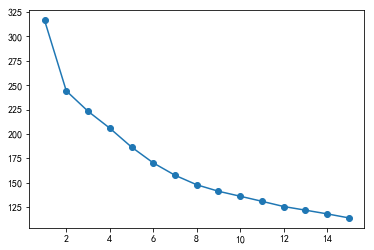

In [154]:
plt.plot(range(1,16),sse,marker='o');

In [155]:
from  sklearn.metrics import  silhouette_score

In [157]:
#轮廓系数
score=[]
for k in range(2,16):
    km=KMeans(n_clusters=k)
    res_km=km.fit(data_norm)
    score.append(silhouette_score(data_norm,res_km.labels_))

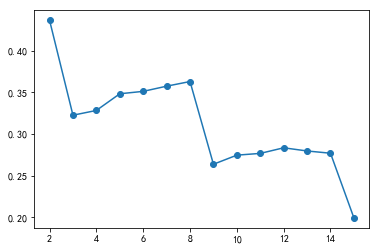

In [158]:
plt.plot(range(2,16),score,marker='o')

### 聚类

In [159]:
km=KMeans(n_clusters=8)

In [160]:
km.fit(data_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [161]:
km.n_clusters

8

In [162]:
km.labels_

array([2, 2, 2, ..., 2, 2, 2])

In [163]:
user_info5['类别']=km.labels_

In [164]:
user_info5.head()

,买家会员名,收货地址,买家实际支付金额,宝贝种类,宝贝总数量,价格,missing,儿童|学生|,婴儿,婴儿幼儿|,婴儿幼儿|儿童|,婴儿幼儿|儿童|学生|,幼儿|,幼儿|儿童|,幼儿|儿童|学生|,类别
0,0,福建省,14.90,1.0,1.0,9.900000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
1,1,北京,37.56,4.0,8.0,4.957500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,2
2,2,吉林省,58.50,2.0,15.0,3.725000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2
3,3,浙江省,13.39,2.0,2.0,4.520000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2
4,4,江苏省,30.87,6.0,6.0,4.651667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2


In [165]:
cluster=user_info5.loc[:,['买家会员名','类别']]

In [166]:
cluster.head()

,买家会员名,类别
0,0,2
1,1,2
2,2,2
3,3,2
4,4,2


In [167]:
cluster.to_csv('cluster.csv',encoding='utf-8',index=False)

## 二、基于用户聚类的结果进行个性化推荐

将你没有购买过的商品，你同一类群中大家又都喜欢的，推荐给你

- 1、用户没买过的商品信息列表【用户-商品（notbuy）】
- 2、【用户-商品（notbuy）】匹配用户类群【用户-商品（notbuy）-类群】
- 3、定义喜欢（用户对商品的购买次数表示喜好度），构建用户对商品的喜好度【用户-商品-喜好度】
- 4、【用户-商品-喜好度】匹配用户类群【用户-商品-喜好度-类群】
- 5、同一类群中的用户对同一种商品的喜好度进行聚合，得到，用户类群对每一个商品的喜好度【类群-商品-平均喜好度】
- 6、将2与5进行合并（商品-类群），得到【用户-商品（notbuy）-类群-类群平均喜好度】
- 7、对用户进行分组排序，推荐

In [178]:
#1用户没买过的商品信息列表【用户-商品（notbuy）】
total=pd.merge(df_order,df_item,on='订单编号',how='left')
user_item=total.loc[:,['买家会员名','标题']]
user_item['购买次数']='suibianxie'
user_item_freq=user_item.groupby(['买家会员名','标题']).count().reset_index()
user_item_all=user_item_freq.pivot_table(index='买家会员名',columns='标题',values='购买次数').fillna(0)
user_item_all=user_item_all.stack().reset_index()
user_item_all.rename(columns={0:'购买次数'},inplace=True)
user_item_notbuy=user_item_all[user_item_all.购买次数==0].drop('购买次数',axis=1)
user_item_notbuy.head()

,买家会员名,标题
0,0,0-1岁婴幼儿摇铃3-6个月宝宝拼接动物手摇铃牙胶男女孩玩具袋装
1,0,10元以下儿童小玩具批发创意棒棒糖发光棒女孩闪光棒夜市地摊货源
2,0,2017创意发光玩具七彩闪光飞轮拉哨旋转男孩儿童玩具地摊货源批发
3,0,2017创意台球桌小玩具儿童礼物男孩义乌玩具批发地摊货源免邮好玩
4,0,2017创意惯性工程车推土机男孩儿童玩具车批发新奇礼物地摊热卖


In [179]:
#2、【用户-商品（notbuy）】匹配用户类群【用户-商品（notbuy）-类群】

In [180]:
user_notbuy_cluster=pd.merge(user_item_notbuy,cluster,on='买家会员名',how='left')

In [182]:
user_notbuy_cluster.head()

,买家会员名,标题,类别
0,0,0-1岁婴幼儿摇铃3-6个月宝宝拼接动物手摇铃牙胶男女孩玩具袋装,2.0
1,0,10元以下儿童小玩具批发创意棒棒糖发光棒女孩闪光棒夜市地摊货源,2.0
2,0,2017创意发光玩具七彩闪光飞轮拉哨旋转男孩儿童玩具地摊货源批发,2.0
3,0,2017创意台球桌小玩具儿童礼物男孩义乌玩具批发地摊货源免邮好玩,2.0
4,0,2017创意惯性工程车推土机男孩儿童玩具车批发新奇礼物地摊热卖,2.0


In [183]:
#3、定义喜欢（用户对商品的购买次数表示喜好度），构建用户对商品的喜好度【用户-商品-喜好度】

In [184]:
user_item_freq.head()

,买家会员名,标题,购买次数
0,0,创意电动飞机发光音乐万向车儿童玩具飞机模型拼装 玩具批发地摊,1
1,1,儿童玩具批发卡通小飞机泡泡枪不漏水手动泡泡机户外吹泡泡地摊货,1
2,1,创意新款发光翅膀背带儿童演出服装天使蝴蝶翅膀地摊货源玩具批发,1
3,1,创意新款夏季热卖小象手摇风扇夜市地摊小玩具批发六一儿童节礼物,1
4,1,创意热卖回力惯性小汽车特警先锋 12辆巴士儿童玩具地摊货源批发,1


In [185]:
#4、【用户-商品-喜好度】匹配用户类群【用户-商品-喜好度-类群】
user_item_freq_cluster=pd.merge(user_item_freq,cluster,on='买家会员名',how='left')

In [186]:
user_item_freq_cluster.head()

,买家会员名,标题,购买次数,类别
0,0,创意电动飞机发光音乐万向车儿童玩具飞机模型拼装 玩具批发地摊,1,2.0
1,1,儿童玩具批发卡通小飞机泡泡枪不漏水手动泡泡机户外吹泡泡地摊货,1,2.0
2,1,创意新款发光翅膀背带儿童演出服装天使蝴蝶翅膀地摊货源玩具批发,1,2.0
3,1,创意新款夏季热卖小象手摇风扇夜市地摊小玩具批发六一儿童节礼物,1,2.0
4,1,创意热卖回力惯性小汽车特警先锋 12辆巴士儿童玩具地摊货源批发,1,2.0


In [187]:
#5、同一类群中的用户对同一种商品的喜好度进行聚合，得到，用户类群对每一个商品的喜好度【类群-商品-平均喜好度】
cluster_item_freq=user_item_freq_cluster.groupby(['类别','标题']).mean()

In [188]:
cluster_item_freq.reset_index(inplace=True)

In [189]:
cluster_item_freq.head()

,类别,标题,买家会员名,购买次数
0,0.0,0-1岁婴幼儿摇铃3-6个月宝宝拼接动物手摇铃牙胶男女孩玩具袋装,1966.000000,1.000000
1,0.0,10元以下儿童小玩具批发创意棒棒糖发光棒女孩闪光棒夜市地摊货源,1537.733333,1.133333
2,0.0,2017创意发光玩具七彩闪光飞轮拉哨旋转男孩儿童玩具地摊货源批发,468.000000,1.000000
3,0.0,2017创意台球桌小玩具儿童礼物男孩义乌玩具批发地摊货源免邮好玩,1674.461538,1.000000
4,0.0,2017创意惯性工程车推土机男孩儿童玩具车批发新奇礼物地摊热卖,779.666667,1.000000


In [328]:
del cluster_item_freq['买家会员名']

In [329]:
cluster_item_freq.head()

,类别,标题,购买次数
0,0.0,10元以下儿童小玩具批发创意棒棒糖发光棒女孩闪光棒夜市地摊货源,1.0
1,0.0,2017创意发光玩具七彩闪光飞轮拉哨旋转男孩儿童玩具地摊货源批发,1.0
2,0.0,2017创意台球桌小玩具儿童礼物男孩义乌玩具批发地摊货源免邮好玩,1.0
3,0.0,2017创意惯性工程车推土机男孩儿童玩具车批发新奇礼物地摊热卖,1.0
4,0.0,2017创意新款惯性工程车 槽罐水泥车汽车男生礼物儿童玩具车批发,1.0


In [332]:
#6、将2与5进行合并（商品-类群），得到【用户-商品（notbuy）-类群-类群平均喜好度】
res=pd.merge(user_notbuy_cluster,cluster_item_freq,on=['标题','类别'],how='left').fillna(0)

In [343]:
#7、对用户进行分组排序，推荐
group=res.groupby('买家会员名')

In [345]:
def get_topk(group,k):
    rec=group.sort_values('购买次数',ascending=False)[:k]
    return rec

In [347]:
topk=group.apply(get_topk,k=5)

In [357]:
topk.head(1)

,买家会员名,标题,类别,购买次数
0,0,特价发条玩具会跑会跳创意上链发条玩具动物儿童好玩的地摊货批,1.0,4.25


In [349]:
del topk['买家会员名']

In [354]:
topk.index=topk.index.droplevel(1)

In [356]:
topk.reset_index(inplace=True)

In [359]:
topk.head(20)

,买家会员名,标题,类别,购买次数
0,0,特价发条玩具会跑会跳创意上链发条玩具动物儿童好玩的地摊货批,1.0,4.250000
1,0,六一新品恐龙玩具模型回力小车迷你玩具车儿童节礼物地摊货源批,1.0,4.000000
2,0,过家家厨房玩具仿真小家电电动热卖单只装迷你儿童玩具女孩童创意,1.0,3.111111
3,0,六一新品恐龙玩具模型回力小车迷你玩具车儿童节礼物地摊货源批发,1.0,2.814815
4,0,经典发条玩具会跑会跳创意上链发条玩具动物儿童好玩的地摊货批发,1.0,2.666667
5,1,特价发条玩具会跑会跳创意上链发条玩具动物儿童好玩的地摊货批,1.0,4.250000
6,1,六一新品恐龙玩具模型回力小车迷你玩具车儿童节礼物地摊货源批,1.0,4.000000
7,1,过家家厨房玩具仿真小家电电动热卖单只装迷你儿童玩具女孩童创意,1.0,3.111111
8,1,六一新品恐龙玩具模型回力小车迷你玩具车儿童节礼物地摊货源批发,1.0,2.814815
9,1,经典发条玩具会跑会跳创意上链发条玩具动物儿童好玩的地摊货批发,1.0,2.666667


In [360]:
topk.to_csv('C:/Users/CDA/Desktop/data/rec.csv',encoding='gbk',index=False)